In [1]:
import magen.solver as solver
from magen.models import chain
from magen.optimizer import BayesianOptimizer
# from bayes_opt import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt
from magen.aux_func import load_experiment_data

In [2]:
from magen import optimizer

In [3]:
experimental_files = {'T':'./Data/demo_data/T.csv',
                     'C':'./Data/demo_data/C.csv',
                     'Chiz':'./Data/demo_data/Chiz.csv',
                     'Chixy':'./Data/demo_data/Chixy.csv'}

exp_thermal_data = load_experiment_data(experimental_files)

In [4]:
mymodel = chain.XXZSpinChain(l=8)
interactions = mymodel.generate_interactions(Jxy=1., Jz=1)
print(interactions)

[['x', 'x', 0, 1, tensor(1.)], ['y', 'y', 0, 1, tensor(1.)], ['z', 'z', 0, 1, tensor(1)], ['x', 'x', 1, 2, tensor(1.)], ['y', 'y', 1, 2, tensor(1.)], ['z', 'z', 1, 2, tensor(1)], ['x', 'x', 2, 3, tensor(1.)], ['y', 'y', 2, 3, tensor(1.)], ['z', 'z', 2, 3, tensor(1)], ['x', 'x', 3, 4, tensor(1.)], ['y', 'y', 3, 4, tensor(1.)], ['z', 'z', 3, 4, tensor(1)], ['x', 'x', 4, 5, tensor(1.)], ['y', 'y', 4, 5, tensor(1.)], ['z', 'z', 4, 5, tensor(1)], ['x', 'x', 5, 6, tensor(1.)], ['y', 'y', 5, 6, tensor(1.)], ['z', 'z', 5, 6, tensor(1)], ['x', 'x', 6, 7, tensor(1.)], ['y', 'y', 6, 7, tensor(1.)], ['z', 'z', 6, 7, tensor(1)], ['x', 'x', 7, 0, tensor(1.)], ['y', 'y', 7, 0, tensor(1.)], ['z', 'z', 7, 0, tensor(1)]]


In [5]:
mysolver = solver.ED_solver(size=mymodel.l)
# mysolver.get_hamiltonian_matrix(interactions)

In [6]:
mymodel.l

8

In [7]:
thermal_data = mysolver.forward(interactions, T=exp_thermal_data.T)

In [8]:
Opt = BayesianOptimizer(parameter_space={'Jxy':(-10, 10), 'Jz':(-10, 10)},
                         n_exp_total=100,
                     solver=solver.ED_solver(size=mymodel.l),
                     model=mymodel,
                        T_cut = 5,
                     exp_thermal_data=exp_thermal_data,
                        record_BO = True,
                    target_obs=['C', 'Chiz'])

In [9]:
res = Opt.minimize(log_accelerate=False)

iteration 1: Loss = -0.07249088937403216, Parameter is {'Jxy': -7.909290805175509, 'Jz': 1.4725305020403034}
iteration 2: Loss = -0.2215974550528515, Parameter is {'Jxy': 1.6841136493907705, 'Jz': -8.88371952035718}
iteration 3: Loss = -0.08171792361705998, Parameter is {'Jxy': -8.071657591546952, 'Jz': 3.7746468538228246}
iteration 4: Loss = -0.08603222597014884, Parameter is {'Jxy': 8.168844644489255, 'Jz': 5.145463318415366}
iteration 5: Loss = -0.07255675968666123, Parameter is {'Jxy': 1.2152958707185775, 'Jz': -5.534113463644799}
iteration 6: Loss = -0.012307624978899466, Parameter is {'Jxy': 4.011671675872815, 'Jz': -1.2513547262062694}
iteration 7: Loss = -0.07597178149237588, Parameter is {'Jxy': -8.460577876890046, 'Jz': 1.64513345052697}
iteration 8: Loss = -0.08997530590053197, Parameter is {'Jxy': -1.432584203575173, 'Jz': 8.202283197245631}
iteration 9: Loss = -0.07400465424559707, Parameter is {'Jxy': -7.978455791648518, 'Jz': 1.7446031684359689}
iteration 10: Loss = -0.0

iteration 75: Loss = -1.2370059751360013e-05, Parameter is {'Jxy': -0.9608894265326775, 'Jz': 1.453142660901051}
iteration 76: Loss = -7.739080527507942e-06, Parameter is {'Jxy': -0.9877502987854392, 'Jz': 1.5442533231166458}
iteration 77: Loss = -1.1497534851524303e-05, Parameter is {'Jxy': -1.1333932176971278, 'Jz': 1.2303657592652968}
iteration 78: Loss = -8.098150234966468e-06, Parameter is {'Jxy': -1.0355238638974544, 'Jz': 1.3631441080305802}
iteration 79: Loss = -1.182311532005666e-05, Parameter is {'Jxy': -0.8497449856073924, 'Jz': 1.6867691023165765}
iteration 80: Loss = -7.86552093707141e-06, Parameter is {'Jxy': 0.9131177091363973, 'Jz': 1.5672872890788518}
iteration 81: Loss = -4.397784526096344e-06, Parameter is {'Jxy': -0.9821528089617395, 'Jz': 1.4798002840192748}
iteration 82: Loss = -1.0959213480931344e-05, Parameter is {'Jxy': 1.1029424256183535, 'Jz': 1.259973434038546}
iteration 83: Loss = -5.103455251034324e-06, Parameter is {'Jxy': -0.9487179605976177, 'Jz': 1.554

In [10]:
from visualize import plot_funcs_2d

(<Figure size 360x360 with 2 Axes>, <AxesSubplot:xlabel='Jxy', ylabel='Jz'>)

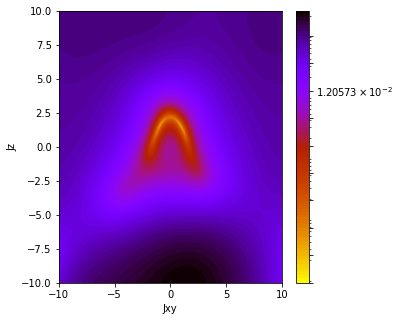

In [11]:
plot_funcs_2d.show_landscape_gp(res, ['Jxy', 'Jz'])

(<Figure size 360x360 with 2 Axes>, <AxesSubplot:xlabel='Jxy', ylabel='Jz'>)

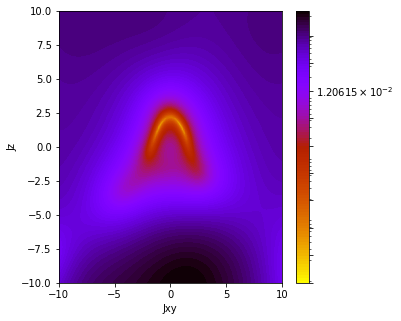

In [12]:
plot_funcs_2d.show_landscape(res, ['Jxy', 'Jz'], itr=-1)

In [13]:
from visualize import plot_funcs_3d

(<Figure size 504x360 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fe48cfc7128>)

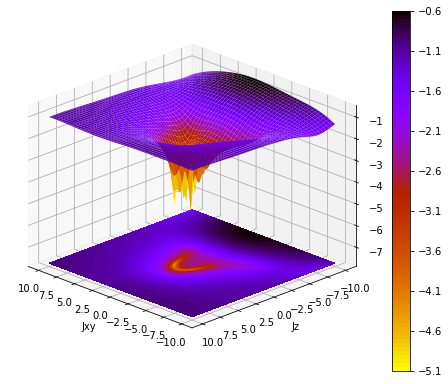

In [14]:
plot_funcs_3d.show_landscape3(res, ['Jxy', 'Jz'], itr=-1)

In [15]:
print('   o')
print('  / \  ...  |  | ')
print('-o - o- ... -o--o-')

   o
  / \  ...  |  | 
-o - o- ... -o--o-


In [16]:
class Animal:
    
    def __init__(self):
        pass
    
class Dog(Animal):
    
    def __init__(self):
        pass
    


In [17]:
mydog = Dog()
mycat = Animal()

In [18]:
isinstance(mydog, Dog)

True

In [19]:
isinstance(mycat, Dog)

False